In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import xarray as xr
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import meijering, sato, frangi, hessian
import cv2
from scipy import ndimage as nd
from skimage import util, exposure, data
import pywt
from skimage.feature import greycomatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report


In [34]:
my_arrays_final = np.load('/content/drive/MyDrive/Augmented Data/numpy_data.npz', allow_pickle=True)

In [35]:
# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [36]:
# Print the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6050, 100, 100, 1)
y_train shape: (6050,)
X_test shape: (1513, 100, 100, 1)
y_test shape: (1513,)


In [37]:
#Reshaping images to a 100x100
X_train_r = X_train.reshape(X_train.shape[0], 100,100)
X_test_r = X_test.reshape (X_test. shape[0], 100, 100)

In [38]:
#Stacking the two image sets
X=np.vstack((X_train_r,X_test_r))
X.shape

(7563, 100, 100)

In [39]:
Y=np.hstack((y_train,y_test))
Y.shape

(7563,)

In [40]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(Y)
labels_encoded = le.transform(Y)
labels_encoded

array([2, 2, 0, ..., 0, 2, 2])

In [ ]:
X_norm=X/255
X_norm[0]

array([[0.2       , 0.20392157, 0.22352941, ..., 0.32156863, 0.32156863,
        0.32156863],
       [0.35686275, 0.29411765, 0.25098039, ..., 0.30980392, 0.31372549,
        0.31764706],
       [0.44313725, 0.47843137, 0.45490196, ..., 0.36470588, 0.33333333,
        0.3254902 ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.74509804, 0.74117647,
        0.7254902 ],
       [1.        , 1.        , 1.        , ..., 0.70588235, 0.72156863,
        0.72941176],
       [1.        , 1.        , 1.        , ..., 0.71372549, 0.71372549,
        0.70588235]])

In [ ]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        #Reset dataframe to blank after each loop.
        df_1 = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        df_2 = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        df_3 = pd.DataFrame()   #Temporary data frame to capture information for each loop.
        # df_3['SHI-TOM','TOM']


        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
        hist,bins = np.histogram(img.ravel(),32,[0,256])
        df_2= pd.DataFrame(hist).transpose()
        df_2.columns=np.floor(bins[1:])
        
        #Append features from current image to the dataset
        # image_dataset_1= pd.concat([image_dataset, df], axis=0)
        # image_dataset=df


        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = graycomatrix(img, [1], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df_1['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df_1['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df_1['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df_1['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df_1['Contrast'] = GLCM_contr

        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df_1['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df_1['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df_1['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df_1['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df_1['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df_1['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df_1['Corr3'] = GLCM_corr3       
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df_1['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df_1['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df_1['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df_1['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df_1['Corr4'] = GLCM_corr4       
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df_1['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df_1['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df_1['Contrast4'] = GLCM_contr4
        
        GLCM5 = graycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df_1['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df_1['Corr5'] = GLCM_corr5       
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df_1['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df_1['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df_1['Contrast5'] = GLCM_contr5


        s_entropy=shannon_entropy(img)
        df_1['shannon_entropy'] = s_entropy
        
        dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
        # img_1 = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
        # dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

        #Shift DFT. First check the output without the shift
        dft_shift = np.fft.fftshift(dft)

        #Calculate magnitude spectrum from the DFT
        #Added 1 as we may see 0 values and log of 0 is indeterminate
        magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
        magnitude_spectrum.shape
        df_1['fourier_1'] = magnitude_spectrum[0].sum()
        df_1['fourier_2'] = magnitude_spectrum[1].sum()


        # df= pd.concat([df_2, df_1], axis=1)
       ################################################################
        # img=x_train[0]
        # plt.imshow(img)

        # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # SHI-TOMASI METHOD
        corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
                        qualityLevel=0.01, minDistance=.01)
        # print(corners.shape)
        a = np.array([len(corners)])
        df_3['SHI-TOM']= a
        # print(len(corners))


        # print(len(corners))

        corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
                qualityLevel=0.01, minDistance=.01,
                useHarrisDetector=True, k=0.04)
        # corners = np.int0(corners)
        a = np.array([len(corners)])
        df_3['TOM']= a

          # Initiate FAST object with default values
        fast = cv2.FastFeatureDetector_create()
          # find and draw the keypoints
        kp = fast.detect(img,None)
          # img2 = cv.drawKeypoints(img, kp, None, color=(0,0,255))
          # # Print all default params
        a = np.array([len(kp)])
        df_3['Keypoints']= a
       ################################################################

        df_4 = pd.DataFrame()

        img2 = img.reshape(-1)
        df_4['Original Image'] = img2
        # entropy_img = entropy(img, disk(4))

        entropy_img = entropy(img, disk(1))
        entropy1 = entropy_img.reshape(-1)
        df_4['Entropy'] = entropy1

        gaussian_img = nd.gaussian_filter(img, sigma=4)
        gaussian_img1 = gaussian_img.reshape(-1)
        df_4['Gaussian s4'] = gaussian_img1

        sobel_img = sobel(img)
        sobel1 = sobel_img.reshape(-1)
        df_4['Sobel'] = sobel1

        meijering_img = meijering(img)
        meijering1 = meijering_img.reshape(-1)
        df_4['meijering'] = meijering1

        sato_img = sato(img)
        sato1 = sato_img.reshape(-1)
        df_4['sato'] = sato1        
        
        frangi_img = frangi(img)
        frangi1 = frangi_img.reshape(-1)
        df_4['frangi'] = frangi1  


        # hessian_img = hessian(img)
        # hessian1 = hessian_img.reshape(-1)
        # df_4['hessian'] = hessian1  

        #ROBERTS EDGE
        edge_roberts = roberts(img)
        edge_roberts1 = edge_roberts.reshape(-1)
        df_4['Roberts'] = edge_roberts1

        #SCHARR
        edge_scharr = scharr(img)
        edge_scharr1 = edge_scharr.reshape(-1)
        df_4['Scharr'] = edge_scharr1

        #PREWITT
        edge_prewitt = prewitt(img)
        edge_prewitt1 = edge_prewitt.reshape(-1)
        df_4['Prewitt'] = edge_prewitt1

        # #GAUSSIAN with sigma=8
        # # gaussian_img2 = nd.gaussian_filter(img, sigma=8)
        # # gaussian_img3 = gaussian_img2.reshape(-1)
        # # df_4['Gaussian s8'] = gaussian_img3

        #MEDIAN with sigma=3
        median_img = nd.median_filter(img, size=3)
        median_img1 = median_img.reshape(-1)
        df_4['Median s3'] = median_img1

        # MEDIAN with sigma=7
        median_img2 = nd.median_filter(img, size=7)
        median_img3 = median_img2.reshape(-1)
        df_4['Median s7'] = median_img3

        #VARIANCE with size=3
        variance_img = nd.generic_filter(img, np.var, size=3)
        variance_img1 = variance_img.reshape(-1)
        df_4['Variance s3'] = variance_img1

        #VARIANCE with size=7
        # variance_img2 = nd.generic_filter(img, np.var, size=7)
        # variance_img3 = variance_img2.reshape(-1)
        # df_4['Variance s7'] = variance_img3 


        # df_4=df_4.sum(axis=0)
        # df_4=df_4.to_frame()
        # df_4=df_4.T
        df_5=df_4.describe()
        df_5.drop(['count','min','max'],axis=0,inplace = True)
        df_5_5=df_5.sum(axis=0)
        df_6=df_5.T
        df_6['sum']=df_5_5
        # df_7=df_6.iloc[:,1:]
        df_7=df_6.to_numpy().flatten()

        strs=[]

        for i in range(len(df_6.index)):
          for j in range(len(df_6.columns)):
            st=(f'{df_6.columns[j]}_{df_6.index[i]}')
            strs.append(st)

        columns = np.array(strs)
        df_8 = pd.DataFrame(df_7)
        df_9=df_8.T
        df_9.columns = columns

        # df= pd.concat([df, df_3], axis=0)
        df_10=pd.DataFrame()

        # img =cv2.imread( '/content/drive/MyDrive/data3a/training/01-minor/0001.JPEG')
        #plt. imshow(img, cmap='gray'), img.shape
        # gray_img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # gray_img.shape
        _,bin_img =cv2.threshold(img,0,255, cv2.THRESH_BINARY)
        #  (gray_img, 100, 255, cv2.THRESH _BINARY)
        #plt.imshow(bin_img, cmap='gray)
        M =cv2.moments (bin_img)
        #print M)
        df_10 = pd.DataFrame.from_dict(M,orient ='index')
        df_11=df_10.T


        df= pd.concat([df_2, df_1,df_3,df_9,df_11], axis=1)

        # df= pd.concat([df, df_3], axis=0)


        # df= pd.concat([df_2, df_1,df_3,df_4], axis=1)

        image_dataset= pd.concat([image_dataset, df], ignore_index= True)

        #Append features from current image to the dataset
        # image_dataset=df

        # # #Append features from current image to the dataset
        # # image_dataset= pd.concat([image_dataset, df], axis=0)
        # # # image_dataset=df
    return image_dataset

In [ ]:
X_norm.dtype

dtype('float64')

In [ ]:
X_scaled = exposure.rescale_intensity(X_norm, out_range=(0, 1))

bin_width = 32
im = util.img_as_ubyte(X_scaled)
X_binned = im//bin_width

In [ ]:
X_binned.dtype

dtype('uint8')

In [ ]:
#Extract features from training images
image_features = feature_extractor(X_binned)
X_for_ML_GLCM_2 =image_features
X_for_ML_GLCM_2.shape

(7563, 165)

In [ ]:
# X_for_ML_GLCM_2.head(5)

In [ ]:
X_for_ML_GLCM_2.to_csv('/content/drive/MyDrive/Augmented Data/Updated_X_for_ML.csv')

In [9]:
X_for_ML_GLCM_2=pd.read_csv('/content/drive/MyDrive/Augmented Data/Updated_X_for_ML.csv')

In [10]:
type(X_for_ML_GLCM_2), X_for_ML_GLCM_2.shape

(pandas.core.frame.DataFrame, (7563, 134))

In [13]:
X_for_ML_GLCM_2

,Unnamed: 0,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.0,0.264634,0.903535,0.503434,0.780376,0.838384,0.217151,0.763237,0.913093,0.646878,...,1.801249e+09,-1.716957e+09,3.027403e+09,0.000376,0.000009,0.000369,3.668942e-08,2.201981e-07,-2.098936e-07,3.700923e-07
1,1.0,0.285634,0.903901,0.420606,0.810015,0.628889,0.235274,0.768040,0.772371,0.685076,...,4.960274e+08,-2.004762e+08,1.538038e+09,0.000338,0.000002,0.000337,-1.110932e-07,5.021905e-08,-2.029671e-08,1.557148e-07
2,2.0,0.313712,0.935211,0.283434,0.869313,0.399596,0.262273,0.808289,0.584536,0.756805,...,8.911498e+08,-1.362886e+09,3.857532e+08,0.000346,0.000006,0.000345,-2.680146e-07,9.728252e-08,-1.487797e-07,4.211081e-08
3,3.0,0.433687,0.822077,0.282020,0.866327,0.355960,0.386074,0.567520,0.511237,0.777100,...,-1.726348e+09,1.609714e+09,1.024628e+09,0.000328,0.000010,0.000333,-3.013729e-08,-1.782142e-07,1.661738e-07,1.057742e-07
4,4.0,0.340590,0.963539,0.302626,0.861203,0.434747,0.298350,0.894669,0.623918,0.746092,...,-5.062713e+09,-1.196212e+09,7.932309e+09,0.000294,0.000067,0.000482,-1.369256e-06,-1.180837e-06,-2.790069e-07,1.850148e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,7558.0,0.292290,0.936553,0.434444,0.798967,0.601515,0.260805,0.865382,0.694433,0.707163,...,6.712936e+08,-6.085418e+08,4.270107e+09,0.000345,0.000006,0.000347,-3.157616e-07,7.259300e-08,-6.580709e-08,4.617650e-07
7559,7559.0,0.270841,0.913987,0.459192,0.818789,0.990101,0.232118,0.822442,0.774948,0.722500,...,3.006939e+09,-1.078439e+08,9.659872e+09,0.000381,0.000013,0.000359,-5.506789e-07,3.843856e-07,-1.378599e-08,1.234849e-06
7560,7560.0,0.335405,0.970018,0.187475,0.915540,0.286263,0.296155,0.913303,0.404742,0.834958,...,4.609909e+08,1.176716e+07,2.028328e+09,0.000334,-0.000003,0.000333,9.264330e-08,4.658864e-08,1.189212e-09,2.049868e-07
7561,7561.0,0.319039,0.941288,0.335960,0.848300,0.503434,0.268414,0.818498,0.692268,0.729916,...,-1.096920e+09,4.968123e+07,4.385604e+09,0.000364,0.000026,0.000379,-7.038300e-07,-1.434943e-07,6.499079e-09,5.737054e-07


In [11]:
X_for_ML_GLCM_2.columns = X_for_ML_GLCM_2.columns.map(str)

In [12]:
X_for_ML_GLCM_2 = X_for_ML_GLCM_2.astype(float)
# X_for_ML_GLCM_2.describe()

In [ ]:
# trail=X_for_ML_GLCM_2.iloc[:,:33]
# trail.describe()
X_for_ML_GLCM_2.drop(X_for_ML_GLCM_2.iloc[:, :32], inplace=True, axis=1)
X_for_ML_GLCM_2.head()

In [ ]:
X_for_ML_GLCM_2.to_csv('/content/drive/MyDrive/Augmented Data/Updated_X_for_ML.csv')

In [29]:
mms = MinMaxScaler()

Data_norm = mms.fit_transform(X_for_ML_GLCM_2)


In [ ]:
new_data = pd.DataFrame(data=Data_norm,
                           columns=X_for_ML_GLCM_2.columns)

# new_data.describe(include='all')

In [ ]:
X_for_ML_GLCM_2.shape

(7563, 165)

In [ ]:
new_data.to_csv('/content/drive/MyDrive/Augmented Data/min_max_X_for_ML.csv')

In [ ]:
new_data

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.092619,0.744091,0.531202,0.414936,0.418721,0.075610,0.688913,0.565447,0.356164,0.389624,...,0.559661,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080
1,0.123968,0.745119,0.435195,0.502847,0.308037,0.101515,0.695775,0.466898,0.437168,0.281397,...,0.507501,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059
2,0.165883,0.833009,0.276197,0.678733,0.186893,0.140108,0.753284,0.335355,0.589281,0.211207,...,0.523291,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459
3,0.344988,0.515435,0.274558,0.669875,0.163838,0.317072,0.409268,0.284023,0.632322,0.147785,...,0.418689,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356
4,0.206008,0.912526,0.298443,0.654678,0.205465,0.191678,0.876706,0.362934,0.566563,0.229105,...,0.285359,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.133905,0.836775,0.451235,0.470078,0.293575,0.138010,0.834860,0.412317,0.484006,0.234124,...,0.514505,0.467899,0.559853,0.067484,0.541523,0.139299,0.849740,0.702804,0.496386,0.446371
7559,0.101883,0.773430,0.479920,0.528874,0.498879,0.097004,0.773506,0.468703,0.516531,0.385345,...,0.607843,0.486689,0.664402,0.078846,0.547300,0.151001,0.847790,0.710485,0.498437,0.457264
7560,0.198267,0.930715,0.164969,0.815847,0.127015,0.188540,0.903330,0.209443,0.755019,0.141593,...,0.506101,0.491178,0.516367,0.064212,0.534391,0.126023,0.853130,0.702164,0.499028,0.442754
7561,0.173836,0.850067,0.337080,0.616405,0.241755,0.148887,0.767870,0.410801,0.532259,0.287589,...,0.443843,0.492601,0.562093,0.073564,0.558330,0.169763,0.846519,0.697481,0.499238,0.447949


In [ ]:
new_data.columns = new_data.columns.map(str)

In [ ]:
# new_data = new_data.drop(new_data.columns[0],axis=1)

In [14]:
X_for_ML_GLCM_2=pd.read_csv('/content/drive/MyDrive/Augmented Data/Feature_data_for_ML.csv')

In [22]:
mn_mx_data=pd.read_csv('/content/drive/MyDrive/Augmented Data/min_max_X_for_ML.csv')

In [25]:
mn_mx_data=mn_mx_data.iloc[:,1:]
mn_mx_data.head(5)

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.092619,0.744091,0.531202,0.414936,0.418721,0.075610,0.688913,0.565447,0.356164,0.389624,...,0.559661,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080
1,0.123968,0.745119,0.435195,0.502847,0.308037,0.101515,0.695775,0.466898,0.437168,0.281397,...,0.507501,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059
2,0.165883,0.833009,0.276197,0.678733,0.186893,0.140108,0.753284,0.335355,0.589281,0.211207,...,0.523291,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459
3,0.344988,0.515435,0.274558,0.669875,0.163838,0.317072,0.409268,0.284023,0.632322,0.147785,...,0.418689,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356
4,0.206008,0.912526,0.298443,0.654678,0.205465,0.191678,0.876706,0.362934,0.566563,0.229105,...,0.285359,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933


In [17]:
# print(new_data.shape)
# new_data

In [26]:
edge_feature=pd.read_csv('/content/drive/MyDrive/Augmented Data/edge_feature_combined.csv')
edge_feature.head(5)

,Unnamed: 0,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,...,Bins_sobel56,Bins_sobel57,Bins_sobel58,Bins_sobel59,Bins_sobel60,Bins_sobel61,Bins_sobel62,Bins_sobel63,Bins_sobel64,label
0,0,96,148,112,121,103,122,106,102,92,...,5,2,1,2,0,0,1,1,1,2.0
1,1,3,2,37,94,101,182,228,331,235,...,0,1,0,1,0,0,1,0,1,2.0
2,2,20,25,14,30,65,103,132,100,97,...,0,6,2,3,4,2,4,6,3,0.0
3,3,3,5,9,35,81,84,57,77,62,...,1,2,0,0,0,2,0,1,1,0.0
4,4,7,25,223,502,472,645,674,583,258,...,0,1,0,1,2,0,0,1,1,1.0


In [27]:
edge_feature_for_X=edge_feature.iloc[:,:-1]
edge_feature_for_X=edge_feature_for_X.iloc[:,1:]
edge_feature_for_X

,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,Bins_sobel55,Bins_sobel56,Bins_sobel57,Bins_sobel58,Bins_sobel59,Bins_sobel60,Bins_sobel61,Bins_sobel62,Bins_sobel63,Bins_sobel64
0,96,148,112,121,103,122,106,102,92,106,...,3,5,2,1,2,0,0,1,1,1
1,3,2,37,94,101,182,228,331,235,306,...,0,0,1,0,1,0,0,1,0,1
2,20,25,14,30,65,103,132,100,97,184,...,5,0,6,2,3,4,2,4,6,3
3,3,5,9,35,81,84,57,77,62,79,...,1,1,2,0,0,0,2,0,1,1
4,7,25,223,502,472,645,674,583,258,219,...,3,0,1,0,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,6,18,91,154,184,338,413,455,407,271,...,2,2,1,1,2,1,2,1,1,2
7559,55,30,56,171,197,189,174,199,189,210,...,6,9,5,10,1,5,0,0,2,1
7560,4,1,2,4,7,13,46,114,234,248,...,3,3,6,3,1,0,0,0,0,1
7561,60,133,192,193,164,159,136,116,159,218,...,3,3,1,1,0,1,1,1,1,1


In [30]:
Data_minmax = mms.fit_transform(edge_feature_for_X)
new_data_edge = pd.DataFrame(data=Data_minmax,
                           columns=edge_feature_for_X.columns)
new_data_edge.head(5)

,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,Bins_sobel55,Bins_sobel56,Bins_sobel57,Bins_sobel58,Bins_sobel59,Bins_sobel60,Bins_sobel61,Bins_sobel62,Bins_sobel63,Bins_sobel64
0,0.015075,0.046351,0.042569,0.030070,0.029692,0.049055,0.056624,0.040189,0.034678,0.040473,...,0.090909,0.151515,0.055556,0.022222,0.057143,0.000000,0.000000,0.01,0.013699,0.000000
1,0.000317,0.000626,0.014063,0.023360,0.029115,0.073181,0.121795,0.130418,0.088579,0.116838,...,0.000000,0.000000,0.027778,0.000000,0.028571,0.000000,0.000000,0.01,0.000000,0.000000
2,0.003015,0.007830,0.005321,0.007455,0.018737,0.041415,0.070513,0.039401,0.036562,0.070256,...,0.151515,0.000000,0.166667,0.044444,0.085714,0.044944,0.023529,0.04,0.082192,0.025316
3,0.000317,0.001566,0.003421,0.008698,0.023350,0.033776,0.030449,0.030339,0.023370,0.030164,...,0.030303,0.030303,0.055556,0.000000,0.000000,0.000000,0.023529,0.00,0.013699,0.000000
4,0.000952,0.007830,0.084759,0.124751,0.136062,0.259349,0.360043,0.229708,0.097248,0.083620,...,0.090909,0.000000,0.027778,0.000000,0.028571,0.022472,0.000000,0.00,0.013699,0.000000


In [32]:
All_featues = pd.concat([new_data_edge, mn_mx_data],axis=1)
print(All_featues.shape)
All_featues.head(5)

(7563, 389)


,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.015075,0.046351,0.042569,0.030070,0.029692,0.049055,0.056624,0.040189,0.034678,0.040473,...,0.559661,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080
1,0.000317,0.000626,0.014063,0.023360,0.029115,0.073181,0.121795,0.130418,0.088579,0.116838,...,0.507501,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059
2,0.003015,0.007830,0.005321,0.007455,0.018737,0.041415,0.070513,0.039401,0.036562,0.070256,...,0.523291,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459
3,0.000317,0.001566,0.003421,0.008698,0.023350,0.033776,0.030449,0.030339,0.023370,0.030164,...,0.418689,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356
4,0.000952,0.007830,0.084759,0.124751,0.136062,0.259349,0.360043,0.229708,0.097248,0.083620,...,0.285359,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933


In [41]:
#Spliting data into train, testidation and test datasets 
x_train, x_test,y_train, y_test = train_test_split(All_featues, labels_encoded, test_size=0.30, random_state=123, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((5294, 389), (5294,), (1134, 389), (1134,), (1135, 389), (1135,))

In [42]:
#Define the classifier
RF_model = RandomForestClassifier(n_estimators = 1, random_state = 42)
RF_model

RandomForestClassifier(n_estimators=1, random_state=42)

In [43]:
x_train.columns = x_train.columns.map(str)
# Fit the model on training data
RF_model.fit(x_train, y_train) #For sklearn no one hot encoding

#Predict on train
train_prediction = RF_model.predict(x_train.values)
#Inverse le transform to get original label back. 
train_prediction_T = le.inverse_transform(train_prediction)
y_train_labels= le.inverse_transform(y_train)

#Print overall accuracy
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", classification_report(y_train_labels, train_prediction_T))

Accuracy =  0.8005289006422365
Accuracy =                precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      1735
         1.0       0.78      0.77      0.78      1766
         2.0       0.81      0.81      0.81      1793

    accuracy                           0.80      5294
   macro avg       0.80      0.80      0.80      5294
weighted avg       0.80      0.80      0.80      5294



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
x_val.columns = x_val.columns.map(str)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_prediction = RF_model.predict(x_val)
#Inverse le transform to get original label back. 
val_prediction_T = le.inverse_transform(val_prediction)
y_val_labels= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))

Accuracy =  0.4894179894179894
Accuracy =                precision    recall  f1-score   support

         0.0       0.58      0.56      0.57       372
         1.0       0.41      0.42      0.42       378
         2.0       0.48      0.49      0.49       384

    accuracy                           0.49      1134
   macro avg       0.49      0.49      0.49      1134
weighted avg       0.49      0.49      0.49      1134



In [45]:
# Reduce dimensions using PCA
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cum variance')

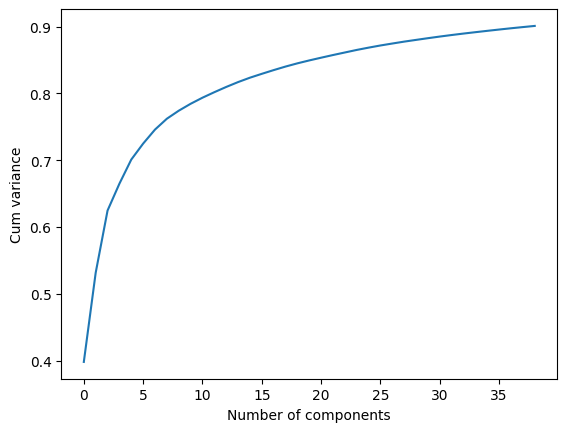

In [46]:
pca = PCA(0.90)
pca.fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

In [47]:
n_PCA_components = 40
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(x_train)

In [48]:
# Fit the model on training data
RF_model.fit(train_PCA, y_train) #For sklearn no one hot encoding

#Predict on train
train_prediction = RF_model.predict(train_PCA)
#Inverse le transform to get original label back. 
# train_prediction_T = le.inverse_transform(train_prediction)
# y_train_labels= le.inverse_transform(y_train)

#Print overall accuracy
# print ("Accuracy = ", metrics.accuracy_score(y_train_labels, train_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_train, train_prediction))
print ("Accuracy = ", classification_report(y_train, train_prediction))

Accuracy =  0.7967510389119759
Accuracy =                precision    recall  f1-score   support

           0       0.80      0.82      0.81      1735
           1       0.78      0.77      0.78      1766
           2       0.81      0.81      0.81      1793

    accuracy                           0.80      5294
   macro avg       0.80      0.80      0.80      5294
weighted avg       0.80      0.80      0.80      5294



In [49]:
# x_val.columns = x_val.columns.map(str)
# val_for_RF.columns = val_for_RF.columns.map(str)

#Predict on val
val_PCA = pca.transform(x_val) #Make sure you are just transforming, not fitting. 
val_prediction = RF_model.predict(val_PCA)
#Inverse le transform to get original label back. 
# val_prediction_T = le.inverse_transform(val_prediction)
# y_val_labels= le.inverse_transform(y_val)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
print ("Accuracy = ", metrics.accuracy_score(y_val, val_prediction))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val, val_prediction))

Accuracy =  0.4488536155202822
Accuracy =                precision    recall  f1-score   support

           0       0.51      0.51      0.51       372
           1       0.38      0.37      0.38       378
           2       0.45      0.46      0.46       384

    accuracy                           0.45      1134
   macro avg       0.45      0.45      0.45      1134
weighted avg       0.45      0.45      0.45      1134



In [50]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd


In [51]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [1, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)

In [53]:
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                          factor=2, resource='n_estimators',
                          max_resources=30).fit(train_PCA, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=24,
                       random_state=0)

In [56]:
#Fitting best grid
best_grid = sh.best_estimator_
best_grid.fit(train_PCA, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=24,
                       random_state=0)

In [57]:
#Predict on train
train_prediction = best_grid.predict(train_PCA)

#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(y_train, train_prediction))
print ("Accuracy = ", classification_report(y_train, train_prediction))

Accuracy =  0.8409520211560257
Accuracy =                precision    recall  f1-score   support

           0       0.82      0.84      0.83      1735
           1       0.87      0.82      0.84      1766
           2       0.84      0.87      0.85      1793

    accuracy                           0.84      5294
   macro avg       0.84      0.84      0.84      5294
weighted avg       0.84      0.84      0.84      5294



In [58]:
#Predict on val
# val_PCA = pca.transform(x_val) 
val_prediction = best_grid.predict(val_PCA)

#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(y_val, val_prediction))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val, val_prediction))

Accuracy =  0.5670194003527337
Accuracy =                precision    recall  f1-score   support

           0       0.64      0.66      0.65       372
           1       0.49      0.42      0.45       378
           2       0.56      0.62      0.59       384

    accuracy                           0.57      1134
   macro avg       0.56      0.57      0.56      1134
weighted avg       0.56      0.57      0.56      1134



In [142]:
#Fitting best grid
best_grid = RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=90,random_state=0)
best_grid.fit(train_PCA, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=90,
                       random_state=0)

In [143]:
#Predict on train
train_prediction = best_grid.predict(train_PCA)
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(y_train, train_prediction))
print ("Accuracy = ", classification_report(y_train, train_prediction))

Accuracy =  0.561956932376275
Accuracy =                precision    recall  f1-score   support

           0       0.57      0.69      0.62      1735
           1       0.54      0.28      0.37      1766
           2       0.57      0.72      0.63      1793

    accuracy                           0.56      5294
   macro avg       0.56      0.56      0.54      5294
weighted avg       0.56      0.56      0.54      5294



In [144]:
#Predict on val
# val_PCA = pca.transform(x_val) 
val_prediction = best_grid.predict(val_PCA)
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(y_val, val_prediction))
from sklearn.metrics import classification_report
print ("Accuracy = ", classification_report(y_val, val_prediction))

Accuracy =  0.5440917107583775
Accuracy =                precision    recall  f1-score   support

           0       0.58      0.68      0.63       372
           1       0.45      0.25      0.32       378
           2       0.55      0.71      0.62       384

    accuracy                           0.54      1134
   macro avg       0.53      0.54      0.52      1134
weighted avg       0.53      0.54      0.52      1134



In [145]:
# x_val.columns = x_val.columns.map(str)
# # val_for_RF.columns = val_for_RF.columns.map(str)

# #Predict on val
# val_prediction = RF_model.predict(x_val)
# #Inverse le transform to get original label back. 
# val_prediction_T = le.inverse_transform(val_prediction)
# y_val_labels= le.inverse_transform(y_val)

# #Print overall accuracy
# from sklearn import metrics
# # print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
# print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_T))
# from sklearn.metrics import classification_report
# print ("Accuracy = ", classification_report(y_val_labels, val_prediction_T))